## Risk of Return
- Simple RR : Suitable for multiple stock
- Logarithmic RR : Suitable for single stock

In [2]:
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [5]:
ticker = 'PG'
source = 'yahoo'
start_date = '1995-1-1'
df_stock = wb.DataReader(ticker, data_source= source, start=start_date )
df_stock.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,8.114557
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,8.049510
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,7.935676


### Calculating Daily Simple Rate of Return
`.shift(#day)` used to go back 1 row

In [7]:
df_stock['simple_return'] = df_stock['Adj Close']/df_stock['Adj Close'].shift(1) - 1
df_stock.head(3)

,High,Low,Open,Close,Volume,Adj Close,simple_return
Date,,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,8.114557,NaN
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,8.049510,-0.008016
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,7.935676,-0.014142


<AxesSubplot:xlabel='Date'>

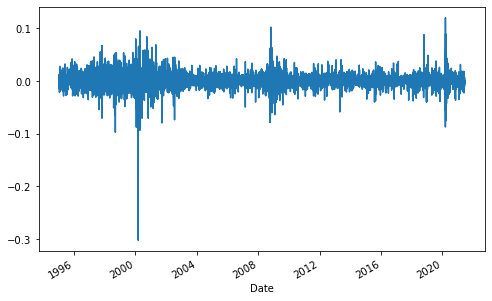

In [9]:
df_stock.simple_return.plot(figsize = (8,5))

In [34]:
daily_average_rr = df_stock.simple_return.mean()
daily_average_rr

0.000523822185987879

In [35]:
# Total days in a year excluding bank holidays and weekends are typically around 250
annual_average_rr = daily_average_rr * 250
annual_average_rr

0.13095554649696975

### Calculating Daily Log Rate of Return

In [12]:
df_stock['log_return'] = np.log(df_stock['Adj Close']/df_stock['Adj Close'].shift(1))
df_stock.head(3)

,High,Low,Open,Close,Volume,Adj Close,simple_return,log_return
Date,,,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,8.114557,NaN,NaN
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,8.049510,-0.008016,-0.008048
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,7.935676,-0.014142,-0.014243


<AxesSubplot:xlabel='Date'>

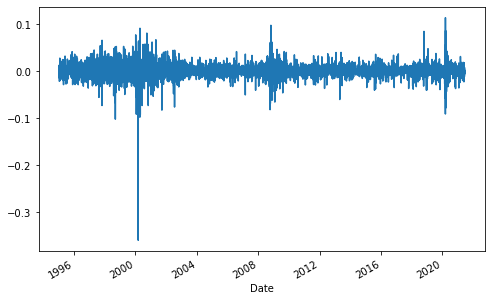

In [14]:
df_stock.log_return.plot(figsize = (8,5))

In [36]:
daily_rr = df_stock.log_return.mean()
annual_rr = daily_rr*250
print("{:.2%}".format(daily_rr))
print("{:.2%}".format(annual_rr))

0.04%
10.55%


### Calculating Investment Portfolio

#### See stocks growth overtime

In [18]:
tickers = ['PG','MSFT','F','GE']
df_stocks = wb.DataReader(tickers, data_source = source, start = start_date)['Adj Close']
df_stocks.head(5)

Symbols,PG,MSFT,F,GE
Date,,,,
1995-01-03,8.114557,2.383754,4.380183,4.119593
1995-01-04,8.049510,2.401081,4.498034,4.119593
1995-01-05,7.935676,2.361476,4.458752,4.129690
1995-01-06,7.951943,2.401081,4.458752,4.109495
1995-01-09,7.919417,2.386229,4.537320,4.069108


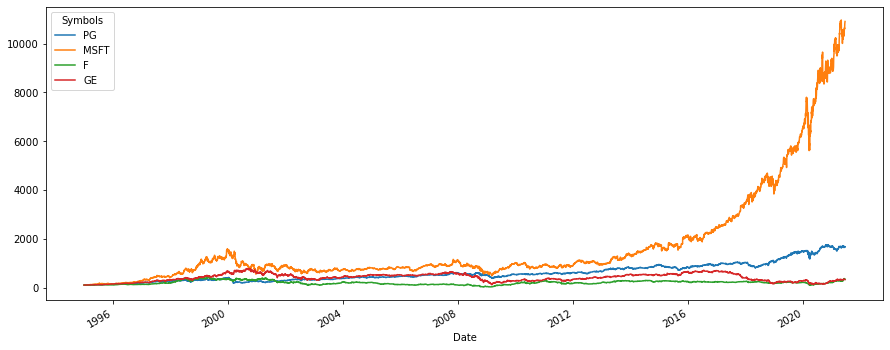

In [19]:
# Normalise data
(df_stocks/df_stocks.iloc[0]*100).plot(figsize=(15,6))
plt.show()

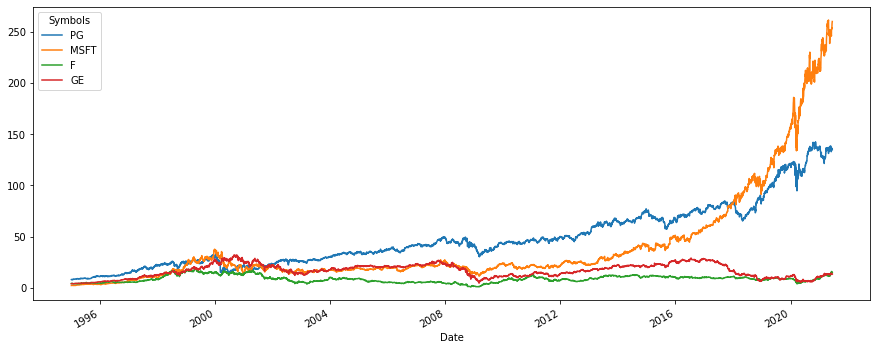

In [20]:
# Non - Normalise data
(df_stocks).plot(figsize=(15,6))
plt.show()

Normalising the data helps to see multiple portfolio growth overtime that starts from the same point

#### Calculating the return of a portfolio

In [22]:
returns = df_stocks/ df_stocks.shift(1) - 1
returns.head(5)

Symbols,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026905,0.000000
1995-01-05,-0.014142,-0.016495,-0.008733,0.002451
1995-01-06,0.002050,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006186,0.017621,-0.009828


In [25]:
weights = np.array([0.25,0.25,0.25,0.25])

In [37]:
daily_returns_mean = returns.mean()
daily_returns_mean

Symbols
PG      0.000524
MSFT    0.000903
F       0.000503
GE      0.000384
dtype: float64

In [39]:
annual_returns_mean = daily_returns_mean*250
annual_returns_mean

Symbols
PG      0.130956
MSFT    0.225769
F       0.125806
GE      0.095952
dtype: float64

In [40]:
"{:.2%}".format(np.dot(annual_returns_mean, weights))

'14.46%'

In [41]:
weights = np.array([0.10,0.10,0.50,0.30])
"{:.2%}".format(np.dot(annual_returns_mean, weights))

'12.74%'

## Stock Indices
Excelent comparator to understand how stock is performing

### US Market
- S&P 500
- DowJones: 30 Index
- Nasdax: Grouped securities mostly IT companies

### Other Market
- UK: FTSE
- Dax 30: Germany
- Nikkei: Japan
- SSE: Chine

In [54]:
tickers_sp500 = '^GSPC'
tickers_nasdaq = '^IXIC'
tickers_germanDax = '^GDAXI'
tickers_ftse = '^FTSE'
tickers_dowjones='^DJI'
start_date = '1997-1-2'
percentage= "{:.2%}"

df_ind_data = wb.DataReader([tickers_sp500,tickers_nasdaq,tickers_germanDax,tickers_ftse], data_source=source, start=start_date)['Adj Close']
df_ind_data.head(3)

/opt/anaconda3/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: '^FTSE', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


Symbols,^GSPC,^IXIC,^GDAXI,^FTSE
Date,,,,
1997-01-02,737.010010,1280.699951,2820.810059,NaN
1997-01-03,748.030029,1310.680054,2863.260010,NaN
1997-01-06,747.650024,1316.400024,2890.199951,NaN


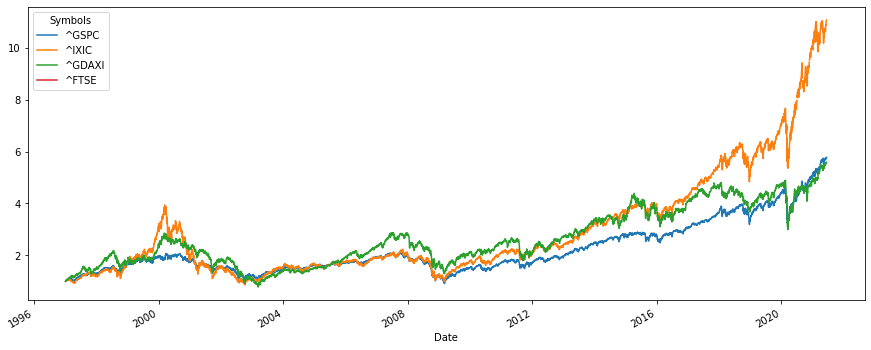

In [55]:
(df_ind_data/df_ind_data.iloc[0]).plot(figsize=(15,6))
plt.show()

In [58]:
ind_simple_return = (df_ind_data/df_ind_data.shift(1)-1).mean()*250
ind_simple_return

Symbols
^GSPC     0.089898
^IXIC     0.128017
^GDAXI    0.080496
^FTSE          NaN
dtype: float64

### Comparing performance of one stock to the market

In [61]:
tickers = ['PG','^GSPC','^DJI']
df_comparison = wb.DataReader(tickers, data_source = 'yahoo', start = '1997-1-1', end = '2000-1-1')['Adj Close']
df_comparison.head(3)

Symbols,PG,^GSPC,^DJI
Date,,,
1996-12-31,14.584128,740.739990,6448.270020
1997-01-02,14.448617,737.010010,6442.490234
1997-01-03,14.685757,748.030029,6544.089844


<AxesSubplot:xlabel='Date'>

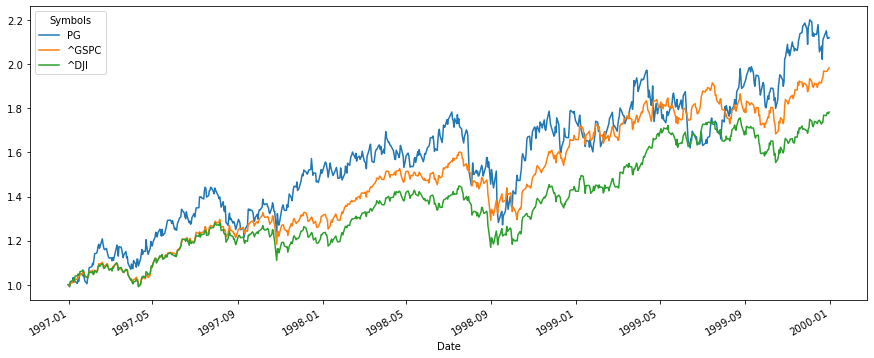

In [63]:
# See normalise adjuster price performance
(df_comparison/df_comparison.iloc[0]).plot(figsize=(15,6))

<AxesSubplot:xlabel='Date'>

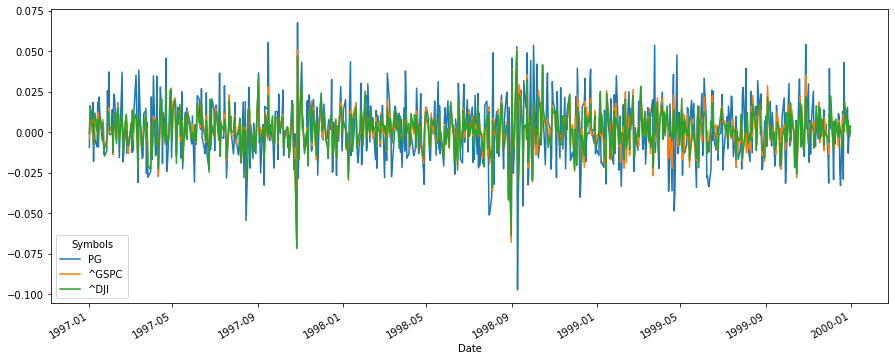

In [64]:
# See daily rate of return performance
((df_comparison/df_comparison.shift(1))-1).plot(figsize=(15,6))

In [65]:
# Annual RR performance
((df_comparison/df_comparison.shift(1))-1).mean()*250

Symbols
PG       0.293376
^GSPC    0.243887
^DJI     0.207661
dtype: float64

We can see that P&G RR perform slightly better than S&P500 during the given period